In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df_sh = pd.read_json('./myspotify/StreamingHistory0.json') 
df_play = pd.read_csv('playlists.csv')
df_albums = pd.read_csv('albums.csv')
df_artists = pd.read_csv('artists.csv')
df_pod = pd.read_csv('podcasts.csv')
df_tracks = pd.read_csv('tracks.csv')


## Dropping columns in each dataframe 

In [3]:
del df_play['Unnamed: 0']
del df_albums['Unnamed: 0']
del df_artists['Unnamed: 0']
del df_pod['Unnamed: 0']
del df_tracks['Unnamed: 0']


## Changing the column names for each DataFrame

In [4]:
# We use inplace to make the changes directly instead of making a copy
df_play = df_play.rename(columns={'index ':'pl_index',
                                  'playlists.name':'pl_name', 
                                  'playlists.lastModifiedDate':'p_lastmoddate',
                                  'playlists.description':'p_description',
                                 'playlists.numberOfFollowers':'p_numfollowers',
                                 'playlists.items.episode':'it_episode',
                                 'playlists.items.localTrack':'it_localtrack',
                                 'playlists.items.addedDate':'it_addeddate',
                                 'playlists.items.track.trackName':'tr_name',
                                 'playlists.items.track.artistName':'tr_artist',
                                 'playlists.items.track.albumName':'tr_album',
                                 'playlists.items.track.trackUri':'tr_url'})



In [5]:
df_albums = df_albums.rename(columns={'albums.artist': 'a_artist',
                        'albums.album': 'a_album',
                       'albums.uri':'a_url'})

In [6]:
df_artists = df_artists.rename(columns={'artists.name':'ar_name','artists.uri':'a_url'})

In [7]:
df_pod = df_pod.rename(columns={'shows.name':'sh_name',
                               'shows.publisher':'sh_publisher',
                               'shows.uri':'sh_url'})

In [8]:
df_tracks = df_tracks.rename(columns={'tracks.artist':'t_artist',
                                     'tracks.album':'t_album',
                                     'tracks.track':'t_track',
                                     'tracks.uri':'t_url'})

## Running some queries from datasets

In [38]:
# df_sh.sort_values(by=['msPlayed'])

In [33]:
# 10 and 20 are records, not NaN values 
# df_sh.where(df_sh['msPlayed']>1000).head(50)

In [46]:
# df_sh['msPlayed'].mean()
# df_sh['msPlayed'].max()
# df_sh['msPlayed'].min()
# df_sh.isna().head(51)


In [9]:
del df_play['it_episode']
del df_play['it_localtrack']
del df_play['p_numfollowers']


In [10]:
# df_play['index'].head(55)

# Deleting a playlist called "My recommendation playlist", (bunch of rows)
df_play = df_play[df_play['pl_name'].str.contains("My recommendation playlist")==False]

df_play.index
# reseting index because records have been deleted
df_play.reset_index(drop=True,inplace=True)



In [11]:
del df_play['p_description']
# df_play.head(60)

## Some filtering

In [12]:
min_msplayed = df_sh[df_sh['msPlayed'] < 300 ].head(60)
min_msplayed

,endTime,artistName,trackName,msPlayed
209,2023-01-10 11:56,The Brain Hacking Academy,Επ. 185: Αυτοεξάρτηση - Το κλειδί της ελευθερίας,0
315,2023-01-19 06:06,Amy Winehouse,You Know I'm No Good,0
339,2023-01-21 08:13,Aynsley Lister,Need Her So Bad,0
361,2023-01-24 18:32,Amy Winehouse,You Know I'm No Good,0
492,2023-01-27 07:20,Jessie Ware,Wildest Moments,0
518,2023-01-27 10:39,Simon & Garfunkel,The Sound of Silence - Acoustic Version,210
532,2023-01-27 10:56,Cigarettes After Sex,K.,80
669,2023-02-03 09:18,Jeff Beal,House Of Cards Main Title Theme,0
674,2023-02-03 11:23,Thomas Newman,The Only Way is Down,104
857,2023-02-10 19:20,Stephen Rennicks,A Quick Getaway,135


In [13]:
lanadelrey = df_tracks[df_tracks['t_artist'] == 'Lana Del Rey']
lanadelrey

,index,t_artist,t_album,t_track,t_url
67,67,Lana Del Rey,Doin' Time,Doin' Time,spotify:track:0cLS7FslBJgsuWwJNRnPWB
131,131,Lana Del Rey,Born To Die - The Paradise Edition,Yayo,spotify:track:2rldjI2fK6nYwlMgaITluf
188,188,Lana Del Rey,Season Of The Witch,Season Of The Witch,spotify:track:5DSi7heBC8eTIFROBvttnp
232,232,Lana Del Rey,hope is a dangerous thing for a woman like me ...,hope is a dangerous thing for a woman like me ...,spotify:track:1PfUKiMDKIlPEF9FfdJawc
235,235,Lana Del Rey,Fuck it I love you / The greatest,The greatest,spotify:track:13F2adrvrpaq2383GHh1Jl


In [14]:
df_sh[(df_sh['msPlayed'] < 300) & (df_sh['artistName'] == 'Nicholas Britell')]

,endTime,artistName,trackName,msPlayed
1360,2023-02-13 09:36,Nicholas Britell,"Rondo in F Minor for Piano and Orchestra - ""Ke...",0
1406,2023-02-13 11:00,Nicholas Britell,Strings Con Fuoco,0
1454,2023-02-13 12:03,Nicholas Britell,The Middle of the World,23
2280,2023-03-04 08:16,Nicholas Britell,"Rondo in F Minor for Piano and Orchestra - ""Ke...",196


In [28]:
# duplicate records in a dataset(json file) 
# df_sh.duplicated()


### .loc and .iloc

In [15]:
df_play.head(15)

,index,pl_name,p_lastmoddate,it_addeddate,tr_name,tr_artist,tr_album,tr_url
0,1,Soundtracks,19-10-23,10-02-23,No Gravity,Mick Gordon,Prey (Original Game Soundtrack),spotify:track:69aJOo35ZXh6oo6hY5vOkw
1,1,Soundtracks,19-10-23,10-02-23,Apocalypse,Jesper Kyd,"Hitman: Blood Money, Original Soundtrack",spotify:track:3Q5LVA3VY1C4G7MxJqkw6q
2,1,Soundtracks,19-10-23,10-02-23,Vegas,Jesper Kyd,"Hitman: Blood Money, Original Soundtrack",spotify:track:61VS7NCbDVaJeOB2Hr75zb
3,1,Soundtracks,19-10-23,10-02-23,Supermarket,Stephen Rennicks,Normal People (Original Score from the Televis...,spotify:track:7fTsKBsnYyk0IG0zVNduEM
4,1,Soundtracks,19-10-23,10-02-23,Going Home,Stephen Rennicks,Normal People (Original Score from the Televis...,spotify:track:3YP3wej9kRa2G9AiLzrZAk
5,1,Soundtracks,19-10-23,10-02-23,I've Known Everything,Jeff Beal,House Of Cards,spotify:track:4QpL3Zs9PFoCszkRJelzSD
6,1,Soundtracks,19-10-23,10-02-23,Rearranging Furniture,Gabriel Yared,By The Sea (Original Motion Picture Soundtrack),spotify:track:3HRqtrUKxbPgE1dqpZT1vb
7,1,Soundtracks,19-10-23,10-02-23,A Quick Getaway,Stephen Rennicks,Normal People (Original Score from the Televis...,spotify:track:0mJ2Pm5DEA2J6BuwfoaPv3
8,1,Soundtracks,19-10-23,10-02-23,Opposites Attract,Clint Mansell,Black Swan,spotify:track:5UWljOxtv1B7yE65Xiqtwf
9,1,Soundtracks,19-10-23,10-02-23,American Beauty,Thomas Newman,American Beauty,spotify:track:6XJGpirOP4Bgurcvkdanxb


In [16]:
df_play.loc[7]

index                                                            1
pl_name                                                Soundtracks
p_lastmoddate                                             19-10-23
it_addeddate                                              10-02-23
tr_name                                            A Quick Getaway
tr_artist                                         Stephen Rennicks
tr_album         Normal People (Original Score from the Televis...
tr_url                        spotify:track:0mJ2Pm5DEA2J6BuwfoaPv3
Name: 7, dtype: object

In [17]:
df_play.iloc[7]

index                                                            1
pl_name                                                Soundtracks
p_lastmoddate                                             19-10-23
it_addeddate                                              10-02-23
tr_name                                            A Quick Getaway
tr_artist                                         Stephen Rennicks
tr_album         Normal People (Original Score from the Televis...
tr_url                        spotify:track:0mJ2Pm5DEA2J6BuwfoaPv3
Name: 7, dtype: object

In [18]:
df_play.loc[df_play['tr_name'] == 'Dead Already']

,index,pl_name,p_lastmoddate,it_addeddate,tr_name,tr_artist,tr_album,tr_url
10,1,Soundtracks,19-10-23,10-02-23,Dead Already,Thomas Newman,American Beauty,spotify:track:5uuZI0l5SMRMAIVzPl1xgU


In [19]:
df_play.loc[df_play['pl_name'] == 'Soundtracks']

,index,pl_name,p_lastmoddate,it_addeddate,tr_name,tr_artist,tr_album,tr_url
0,1,Soundtracks,19-10-23,10-02-23,No Gravity,Mick Gordon,Prey (Original Game Soundtrack),spotify:track:69aJOo35ZXh6oo6hY5vOkw
1,1,Soundtracks,19-10-23,10-02-23,Apocalypse,Jesper Kyd,"Hitman: Blood Money, Original Soundtrack",spotify:track:3Q5LVA3VY1C4G7MxJqkw6q
2,1,Soundtracks,19-10-23,10-02-23,Vegas,Jesper Kyd,"Hitman: Blood Money, Original Soundtrack",spotify:track:61VS7NCbDVaJeOB2Hr75zb
3,1,Soundtracks,19-10-23,10-02-23,Supermarket,Stephen Rennicks,Normal People (Original Score from the Televis...,spotify:track:7fTsKBsnYyk0IG0zVNduEM
4,1,Soundtracks,19-10-23,10-02-23,Going Home,Stephen Rennicks,Normal People (Original Score from the Televis...,spotify:track:3YP3wej9kRa2G9AiLzrZAk
5,1,Soundtracks,19-10-23,10-02-23,I've Known Everything,Jeff Beal,House Of Cards,spotify:track:4QpL3Zs9PFoCszkRJelzSD
6,1,Soundtracks,19-10-23,10-02-23,Rearranging Furniture,Gabriel Yared,By The Sea (Original Motion Picture Soundtrack),spotify:track:3HRqtrUKxbPgE1dqpZT1vb
7,1,Soundtracks,19-10-23,10-02-23,A Quick Getaway,Stephen Rennicks,Normal People (Original Score from the Televis...,spotify:track:0mJ2Pm5DEA2J6BuwfoaPv3
8,1,Soundtracks,19-10-23,10-02-23,Opposites Attract,Clint Mansell,Black Swan,spotify:track:5UWljOxtv1B7yE65Xiqtwf
9,1,Soundtracks,19-10-23,10-02-23,American Beauty,Thomas Newman,American Beauty,spotify:track:6XJGpirOP4Bgurcvkdanxb


In [12]:
df_play.get(['tr_name','tr_artist'])

,tr_name,tr_artist
0,No Gravity,Mick Gordon
1,Apocalypse,Jesper Kyd
2,Vegas,Jesper Kyd
3,Supermarket,Stephen Rennicks
4,Going Home,Stephen Rennicks
...,...,...
157,Leaving the Table,Leonard Cohen
158,You Want It Darker,Leonard Cohen
159,Say Yes To Heaven,Lana Del Rey
160,Fix You,Coldplay


In [ ]:
songs = pd.DataFrame()

In [10]:
# we want to check if the df_play dataframe have the same artist and tracks as the df_sh and whick tracks are not in the df_play dataframe
df_sh

,endTime,artistName,trackName,msPlayed
0,2022-11-04 16:54,Midnight Oil,Beds Are Burning - Remastered,278890
1,2022-11-10 11:04,Leonard Cohen,You Want It Darker,18785
2,2022-11-10 11:09,Scorpions,Still Loving You,316854
3,2022-11-10 11:09,Supertramp,The Logical Song - Remastered 2010,9771
4,2022-11-10 11:12,Supertramp,Breakfast In America,159440
...,...,...,...,...
3543,2023-11-06 16:54,Stephen Rennicks,Going Home,2453
3544,2023-11-06 16:54,Stephen Rennicks,Supermarket,89716
3545,2023-11-06 16:55,Stephen Rennicks,A Quick Getaway,63360
3546,2023-11-06 16:55,Chris Remo,An Unfortunate Discovery,28610


### Dropping duplicated values

In [21]:
# tms = pd.DataFrame(df_sh['msPlayed'].value_counts())
tms = pd.DataFrame(df_sh.get(['artistName','trackName','msPlayed']).value_counts())
ndf = pd.DataFrame(tms.sort_values(by='msPlayed').duplicated()).reset_index()
# ndf.tail(55)
# zeropl = ndf.loc[ndf['msPlayed'] == 0].head(55)
# zeropl


minpl = ndf.loc[(ndf['msPlayed'] > 70000) & (ndf['msPlayed'] < 75000)]
minpl

# maxpl = ndf.loc[ndf['msPlayed'] > 180000]
# maxpl

# pd.DataFrame(tms.duplicated() == True)
# tms.sort_values(by='msPlayed', ascending=False).drop_duplicates(subset=['trackName','artistName'], keep="first")

,artistName,trackName,msPlayed,0
1504,Nicholas Britell,Andante in C Minor,70162,True
1505,Sonny J,Handsfree (If You Hold My Hand) - Radio Edit,70213,True
1506,The Rolling Stones,Anybody Seen My Baby?,70225,True
1507,Justin Hurwitz,Armstrong Cabin,70300,True
1508,Thomas Newman,Dead Already,70400,True
1509,Gabriel Yared,Rearranging Furniture,70700,True
1510,Roque Baños,Dear Daughter,70831,True
1511,Vera Sola,The Cage,70960,True
1512,Nicholas Britell,Adagio in C Minor,71000,True
1513,Stephen Rennicks,A Quick Getaway,71010,True


In [56]:
# most_played = pd.DataFrame(df_sh.groupby('trackName')['msPlayed'].max())
# most_played.head(55)

## Data visualization 

<Axes: xlabel='msPlayed', ylabel='trackName'>

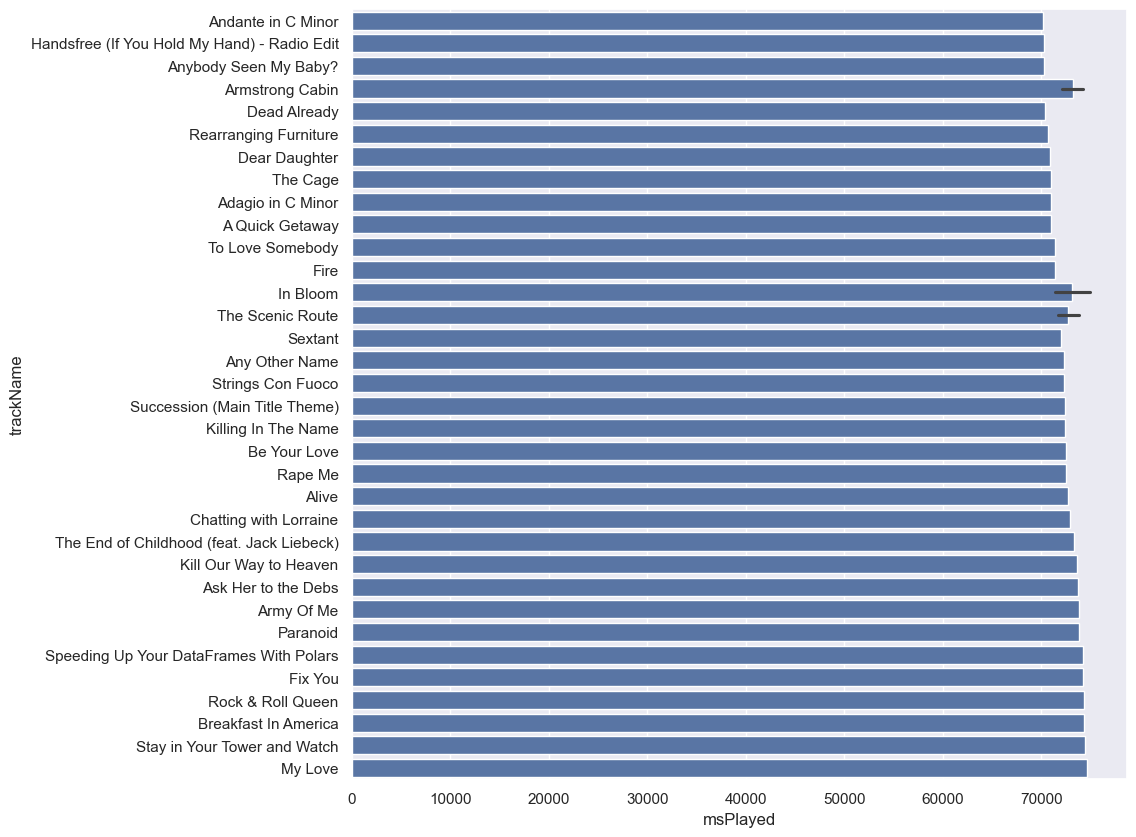

In [23]:
# you have to apply the theme 
plt.figure(figsize=(10,10))
sns.set_theme()
# sns.barplot(tms)
# sns.barplot(zeropl,x='trackName',y='msPlayed')
sns.barplot(minpl,y='trackName',x='msPlayed')
# sns.barplot(maxpl,y='trackName', y='msPlayed')

## A code I found in stackoverflow for normalizing nested json files

In [3]:
def flatten_nested_json_df(df):
    df = df.reset_index()
    s = (df.applymap(type) == list).all()
    list_columns = s[s].index.tolist()
    
    s = (df.applymap(type) == dict).all()
    dict_columns = s[s].index.tolist()

    
    while len(list_columns) > 0 or len(dict_columns) > 0:
        new_columns = []

        for col in dict_columns:
            horiz_exploded = pd.json_normalize(df[col]).add_prefix(f'{col}.')
            horiz_exploded.index = df.index
            df = pd.concat([df, horiz_exploded], axis=1).drop(columns=[col])
            new_columns.extend(horiz_exploded.columns) # inplace

        for col in list_columns:
            #print(f"exploding: {col}")
            df = df.drop(columns=[col]).join(df[col].explode().to_frame())
            new_columns.append(col)

        s = (df[new_columns].applymap(type) == list).all()
        list_columns = s[s].index.tolist()

        s = (df[new_columns].applymap(type) == dict).all()
        dict_columns = s[s].index.tolist()
    return df

In [20]:
# Saving them as csv file (e.g. tracks.json -> tracks.csv)
# ttf = flatten_nested_json_df(df_tracks)
# ttf.to_csv('tracks.csv')